# Redes Neurais multicamadas

In [1]:
# bibliotecas básicas
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import numpy as np

import torch
from torch import nn
from torch import optim

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

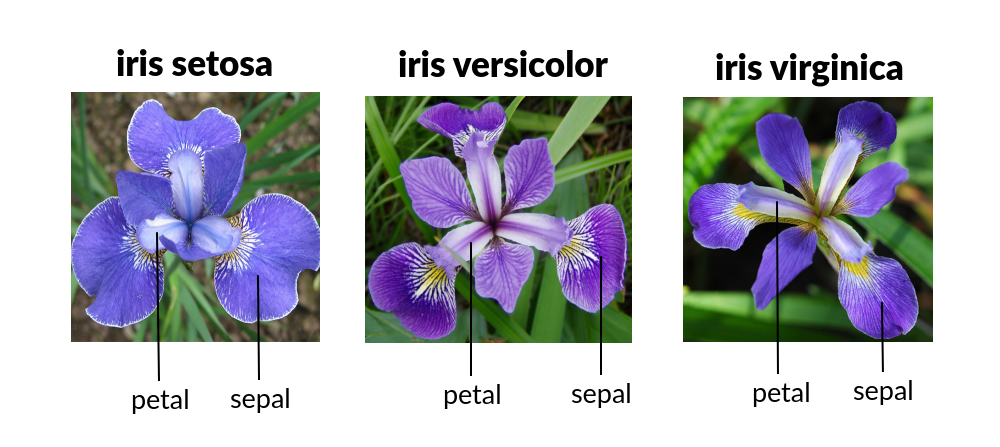

In [2]:
# dataset Iris
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# virginica e versicolor
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-virginica', 0, 1)

# comps sepal e petal
X = df.iloc[50:150, [0,1,2,3]].values
X_outra= df.iloc[:49, [0,1,2,3]].values

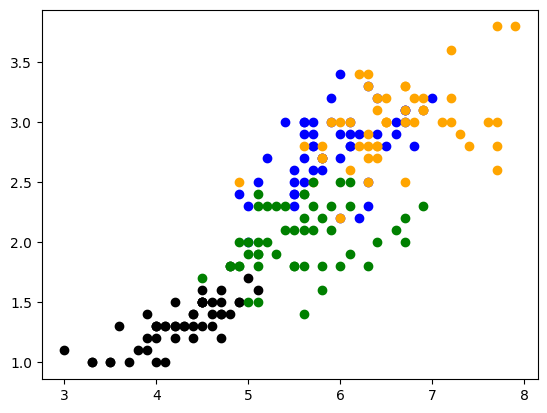

In [3]:
# projeção versicolor x virginica

x1, y1 = X[y==1,0],X[y==1,1]
x0, y0 = X[y==0,0], X[y==0,1]

x3, y3 = X[y==1,2],X[y==1,3]
x2, y2 = X[y==0,2], X[y==0,3]

ylim = [min(min(x1) , min(x0))-1, max(max(x0) , max(x1))+1]
x = np.linspace(ylim[0], ylim[1], 2)
plt.scatter(x1,y1, color='blue')
plt.scatter(x0,y0,color='orange')
plt.scatter(x3,y3, color='black')
plt.scatter(x2,y2,color='green')
plt.show()

In [4]:
import matplotlib.pyplot as plt

def matrixConf( conf_mat,y_true_labels):
    # Define o tamanho da figura
    plt.figure(figsize=(15, 10))
    classes = 2
    # Define mapa de cores
    cmap = plt.cm.Blues

    # Plota matriz de confusão
    plt.imshow(conf_mat, cmap=cmap)
    plt.colorbar()

    # Adiciona rótulos a matriz
    plt.xticks([int(i) for i in range(1)], [str(i) for i in range(1)])
    plt.yticks([int(i) for i in range(1)], [str(i) for i in range(1)])
    for i in range(classes):
        for j in range(classes):
            plt.text(j, i, str(conf_mat[i, j]), ha='center', va='center', color='white'
                     if conf_mat[i, j] > len(y_true_labels)/ classes else 'black')

    # Adiciona rótulos dos eixos
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')

    # Mostra o plot
    plt.show()

In [5]:
from sklearn.metrics import confusion_matrix,  accuracy_score, precision_score, recall_score, f1_score
def resultados(y_pred, y_test):


    # Calcular a matriz de confusão

    conf_mat = confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Confusion Matrix:\n", conf_mat)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)


    # Total de classes (times de futebol)

    matrixConf(conf_mat,y_test)

In [13]:
import numpy as np
from tqdm import tqdm
  # neuronio(Taxa de aprendizado, Número de épocas (iterações de treinamento))
def neuronio(learning_rate = 0.1,epochs = 100, x = X_train, y = y_train):

  # Inicialização dos pesos e bias
  w = np.random.rand(4)
  b = np.random.rand(1)
  hist= []



  # Treinamento do Perceptron
  for _ in tqdm(range(epochs)):
      total_error = 0  # Inicializa o erro total para esta época
      for i in range(len(x)):
          # Converte X_train[i] para um array NumPy
          x_i = np.array(x[i])

          # Calcula a saída do neurônio
          z = np.dot(x_i, w) + b
          a = 1 if z > 0 else 0  # Função de ativação (degrau)

          # Calcula o erro
          error = y[i] - a
          total_error += error # Acumula o erro

          # Atualiza os pesos
          w += learning_rate * error * x_i

      # Atualiza o bias com base no erro médio
      b += learning_rate * (total_error / len(x))
      hist.append(abs(total_error))


  return w,b,hist

In [7]:
import matplotlib.pyplot as plt
def graf_loss(hist):
  # Plota a perda (loss) e a perda de validação (val_loss) durante o treinamento
  plt.plot(hist, label='Training Loss')
  plt.title('Loss and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [8]:
def test(X_test,y_test,w, b):
  saida_test=[]

  for i,a in enumerate(X_test):
    # Teste do neurônio treinado
    teste = a
    resultado_r = y_test[i]
    z = np.dot(teste, w) + b  # Calcula a saída do neurônio
    resultado = 1 if z > 0 else 0  # Função de ativação (degrau)
    saida_test.append(resultado)
  return saida_test

In [12]:

def teste_variaves(epochs = 100, x = X_train, y = y_train ,X_test=X_test,y_test=y_test):
  bs = []
  ws = []

  print("\nTreinando com learning_rate == 0.0001 ")
  w,b,hist = neuronio( 0.0001,epochs , x , y )
  print("\nGrafico da função loss no treinamento com learning_rate == 0.0001 ")
  graf_loss(hist)
  saida_test = test(X_test,y_test,w, b)
  resultados(saida_test, y_test)
  bs.append(b)
  ws.append(w)


  print("\nTreinando com learning_rate == 0.001 ")
  w,b,hist = neuronio( 0.001,epochs , x , y )
  print("\nGrafico da função loss no treinamento com learning_rate == 0.001 ")
  graf_loss(hist)
  saida_test = test(X_test,y_test,w, b)
  resultados(saida_test, y_test)
  bs.append(b)
  ws.append(w)

  print("\nTreinando com learning_rate == 0.01 ")
  w,b,hist = neuronio( 0.01,epochs , x , y )
  print("\nGrafico da função loss no treinamento com learning_rate == 0.01 ")
  graf_loss(hist)
  saida_test = test(X_test,y_test,w, b)
  resultados(saida_test, y_test)
  bs.append(b)
  ws.append(w)

  print("\nTreinando com learning_rate == 0.1 ")
  w,b,hist = neuronio( 0.1,epochs , x , y )
  print("\nGrafico da função loss no treinamento com learning_rate == 0.1 ")
  graf_loss(hist)
  saida_test = test(X_test,y_test,w, b)
  resultados(saida_test, y_test)
  bs.append(b)
  ws.append(w)

  return bs,ws


In [10]:

import pandas as pd
def teste_novas_classe(bs,ws):
  saida_test  =[]
  saida_test1 =[]
  saida_test2 =[]
  saida_test3 =[]
  for a in X_outra:
    # Teste do neurônio treinado
    teste = a

    z = np.dot(teste, ws[0]) + bs[0]  # Calcula a saída do neurônio
    resultado = 1 if z > 0 else 0  # Função de ativação (degrau)
    saida_test.append(resultado)

    z = np.dot(teste, ws[1]) + bs[1]  # Calcula a saída do neurônio
    resultado = 1 if z > 0 else 0  # Função de ativação (degrau)
    saida_test1.append(resultado)

    z = np.dot(teste, ws[2]) + bs[2] # Calcula a saída do neurônio
    resultado = 1 if z > 0 else 0  # Função de ativação (degrau)
    saida_test2.append(resultado)

    z = np.dot(teste, ws[3]) + bs[3]  # Calcula a saída do neurônio
    resultado = 1 if z > 0 else 0  # Função de ativação (degrau)
    saida_test3.append(resultado)
  def graf(saida_test,title):
    data_df = pd.DataFrame(saida_test)
    category_counts =  data_df[0].value_counts()
    plt.figure(figsize=(12, 6))
    category_counts.plot(kind='bar')
    plt.xlabel('Categories')
    plt.ylabel('Number of Articles')
    plt.title(title)
    plt.show()
    print(category_counts)

  graf(saida_test,"\nGrafico quando uma nova classe é inserida treinamento com learning_rate == 0.0001 ")
  graf(saida_test1,"\nGrafico quando uma nova classe é inserida treinamento com learning_rate == 0.001 ")
  graf(saida_test2,"\nGrafico quando uma nova classe é inserida treinamento com learning_rate == 0.01 ")
  graf(saida_test3,"\nGrafico quando uma nova classe é inserida treinamento com learning_rate == 0.1 ")

# **50%50%**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print(len(X_train),len(X_test), len(y_train), len(y_test) )

50 50 50 50



Treinando com learning_rate == 0.0001 


100%|██████████| 100/100 [00:00<00:00, 611.61it/s]


Grafico da função loss no treinamento com learning_rate == 0.0001 


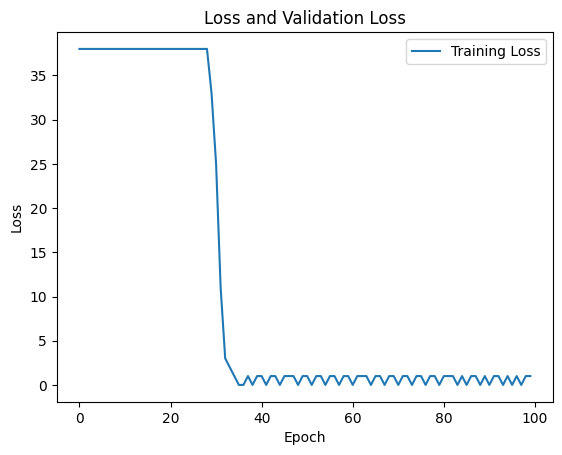

Confusion Matrix:
 [[ 6  6]
 [ 6 12]]
Accuracy: 0.6
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666


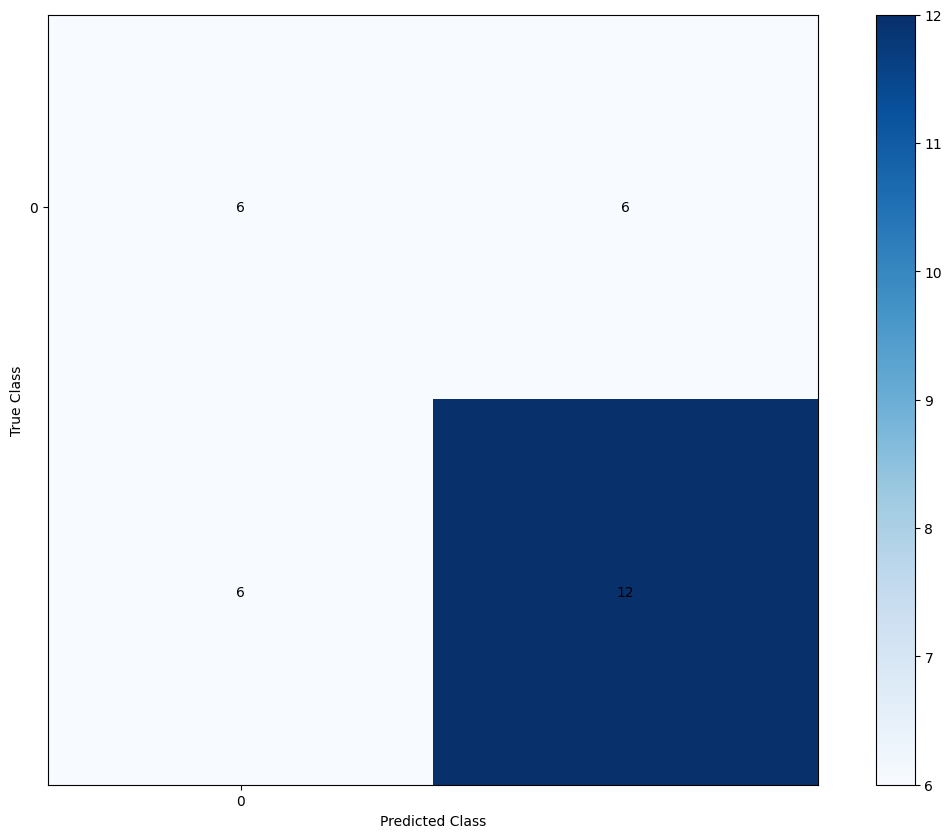


Treinando com learning_rate == 0.001 


100%|██████████| 100/100 [00:00<00:00, 1346.08it/s]


Grafico da função loss no treinamento com learning_rate == 0.001 


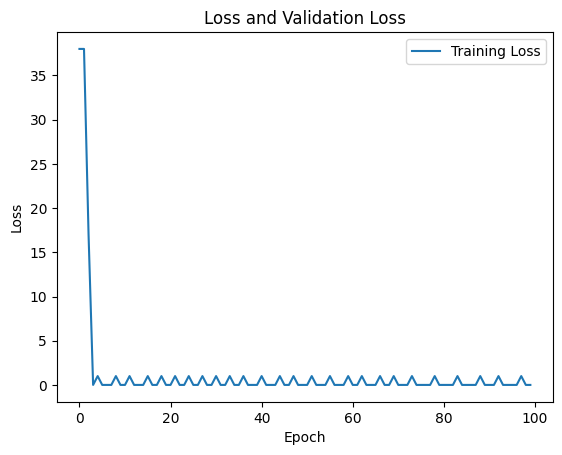

Confusion Matrix:
 [[ 8  4]
 [ 1 17]]
Accuracy: 0.8333333333333334
Precision: 0.8095238095238095
Recall: 0.9444444444444444
F1-score: 0.8717948717948718


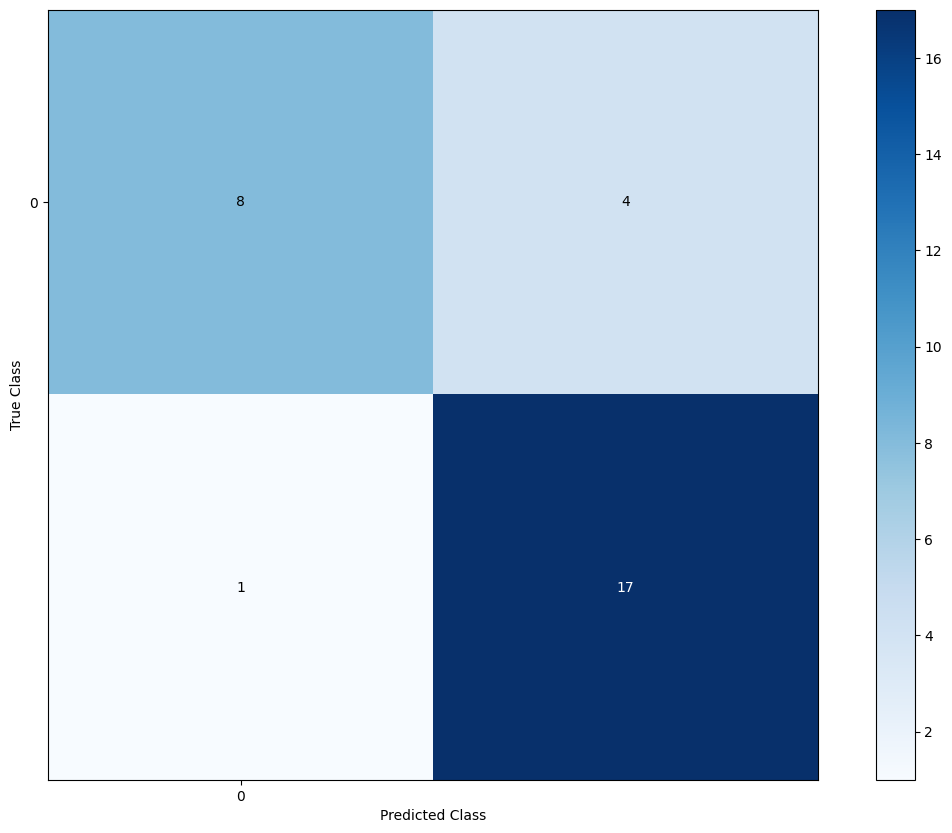


Treinando com learning_rate == 0.01 


100%|██████████| 100/100 [00:00<00:00, 1324.42it/s]


Grafico da função loss no treinamento com learning_rate == 0.01 


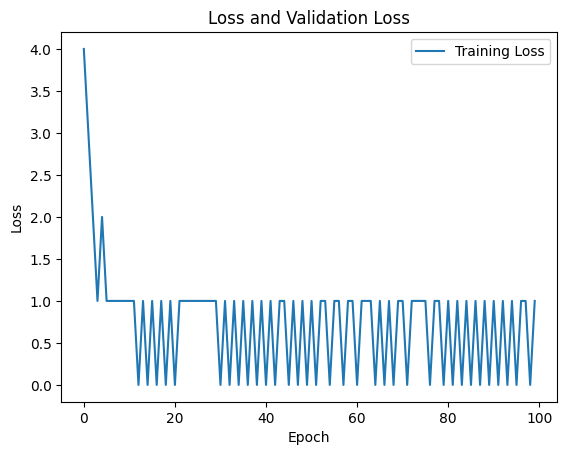

Confusion Matrix:
 [[ 4  8]
 [ 0 18]]
Accuracy: 0.7333333333333333
Precision: 0.6923076923076923
Recall: 1.0
F1-score: 0.8181818181818181


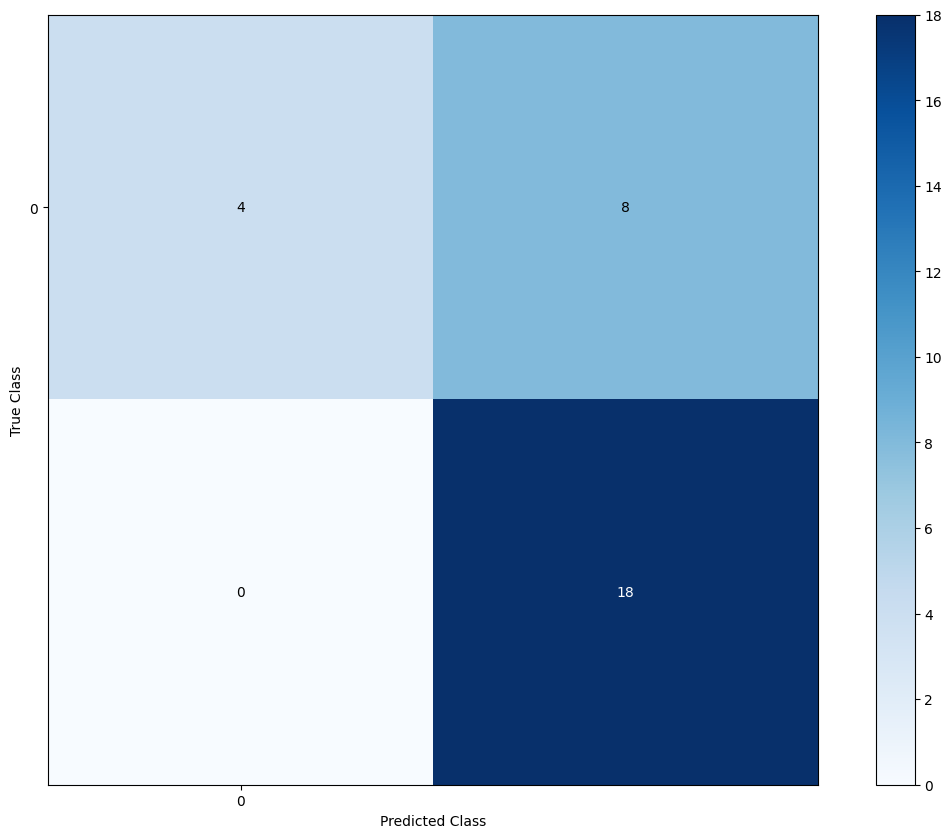


Treinando com learning_rate == 0.1 


100%|██████████| 100/100 [00:00<00:00, 1008.19it/s]


Grafico da função loss no treinamento com learning_rate == 0.1 


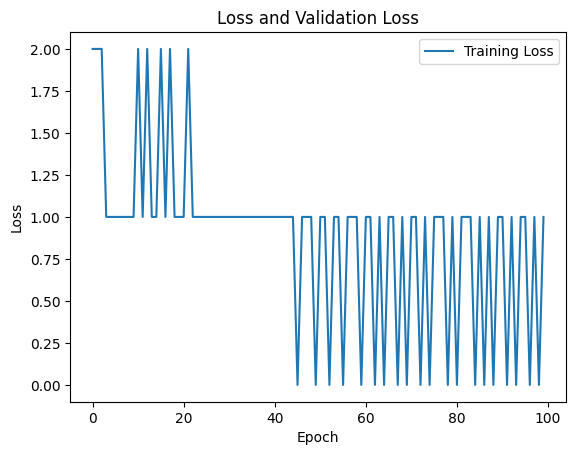

Confusion Matrix:
 [[ 5  7]
 [ 1 17]]
Accuracy: 0.7333333333333333
Precision: 0.7083333333333334
Recall: 0.9444444444444444
F1-score: 0.8095238095238096


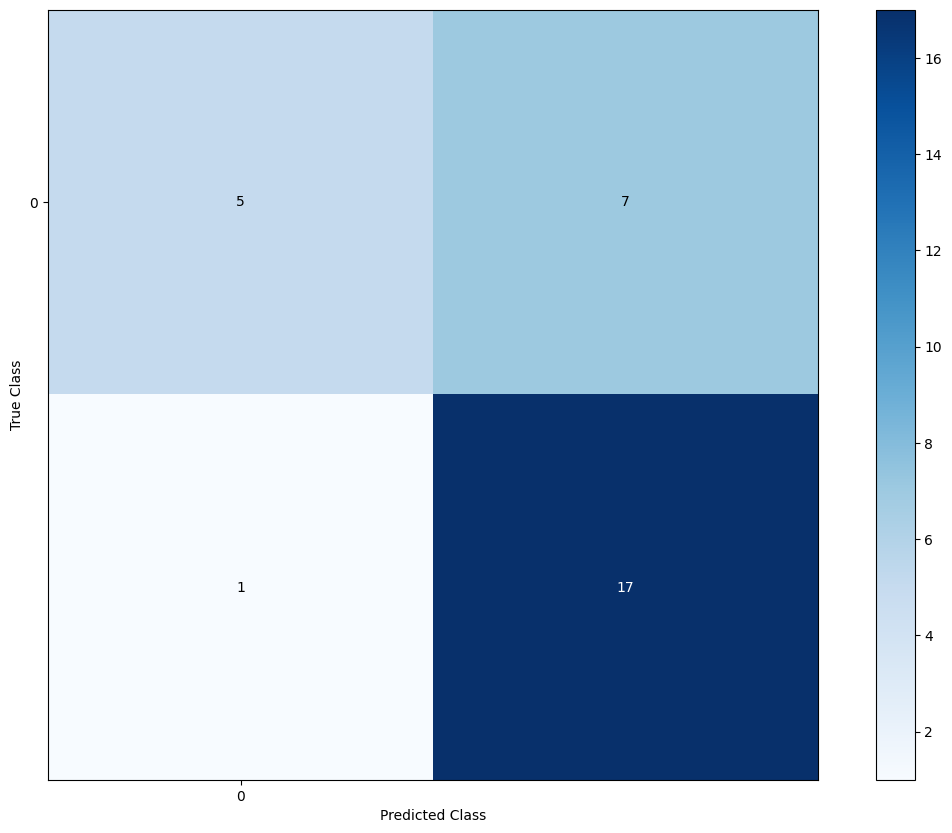

In [25]:
bs,ws = teste_variaves(epochs = 100, x = X_train, y = y_train ,X_test=X_test,y_test=y_test)

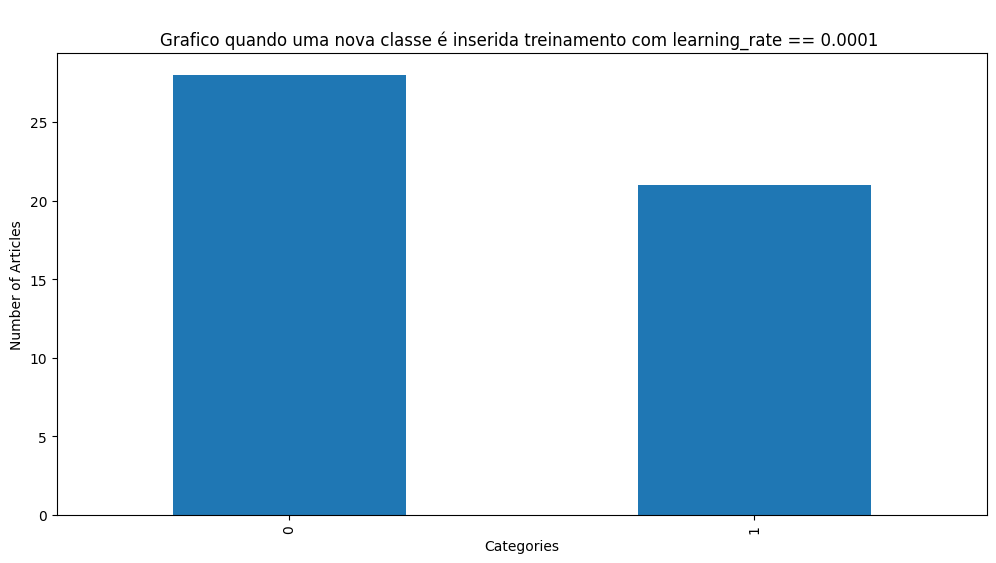

0    28
1    21
Name: 0, dtype: int64


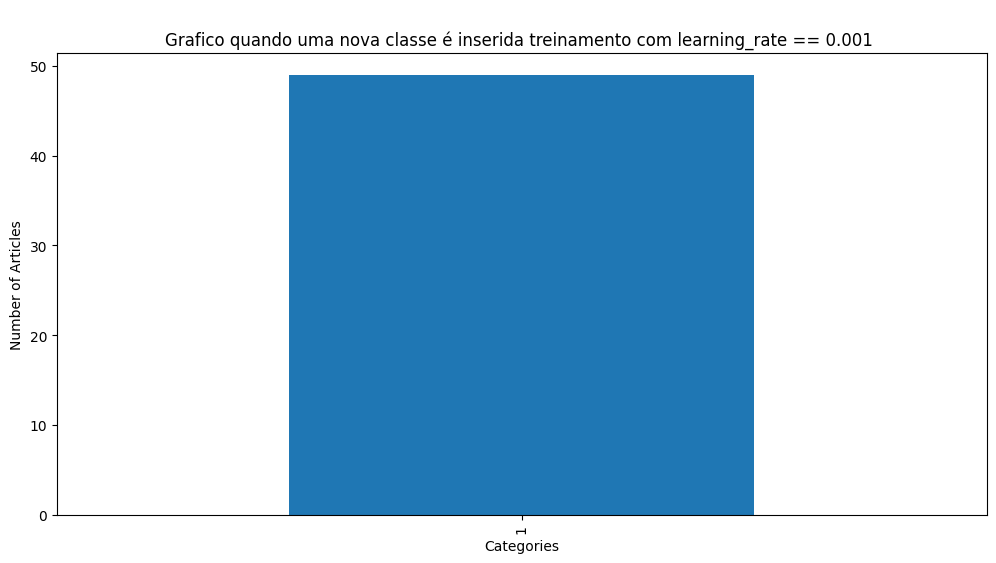

1    49
Name: 0, dtype: int64


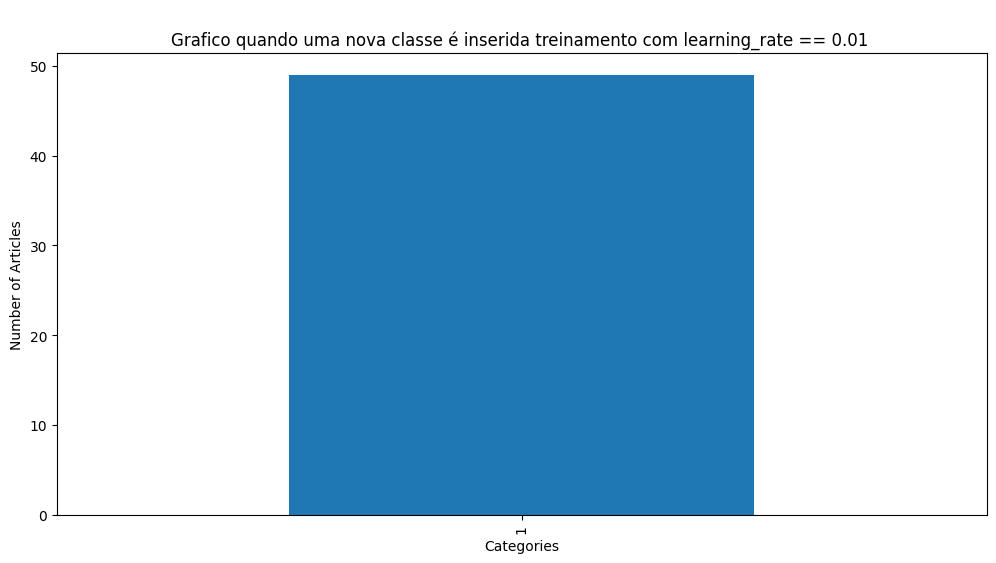

1    49
Name: 0, dtype: int64


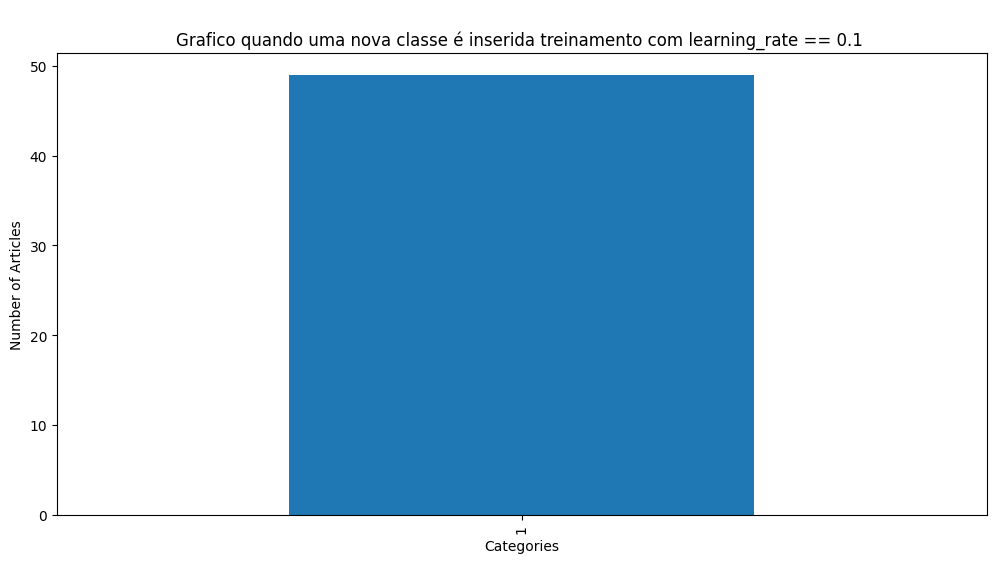

1    49
Name: 0, dtype: int64


In [15]:
teste_novas_classe(bs,ws)

# **70%30%**

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(len(X_train),len(X_test), len(y_train), len(y_test) )

70 30 70 30



Treinando com learning_rate == 0.0001 


100%|██████████| 100/100 [00:00<00:00, 1311.13it/s]


Grafico da função loss no treinamento com learning_rate == 0.0001 


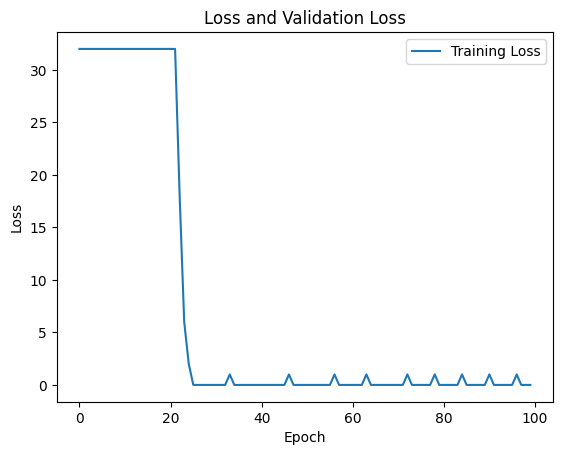

Confusion Matrix:
 [[14  4]
 [ 0 12]]
Accuracy: 0.8666666666666667
Precision: 0.75
Recall: 1.0
F1-score: 0.8571428571428571


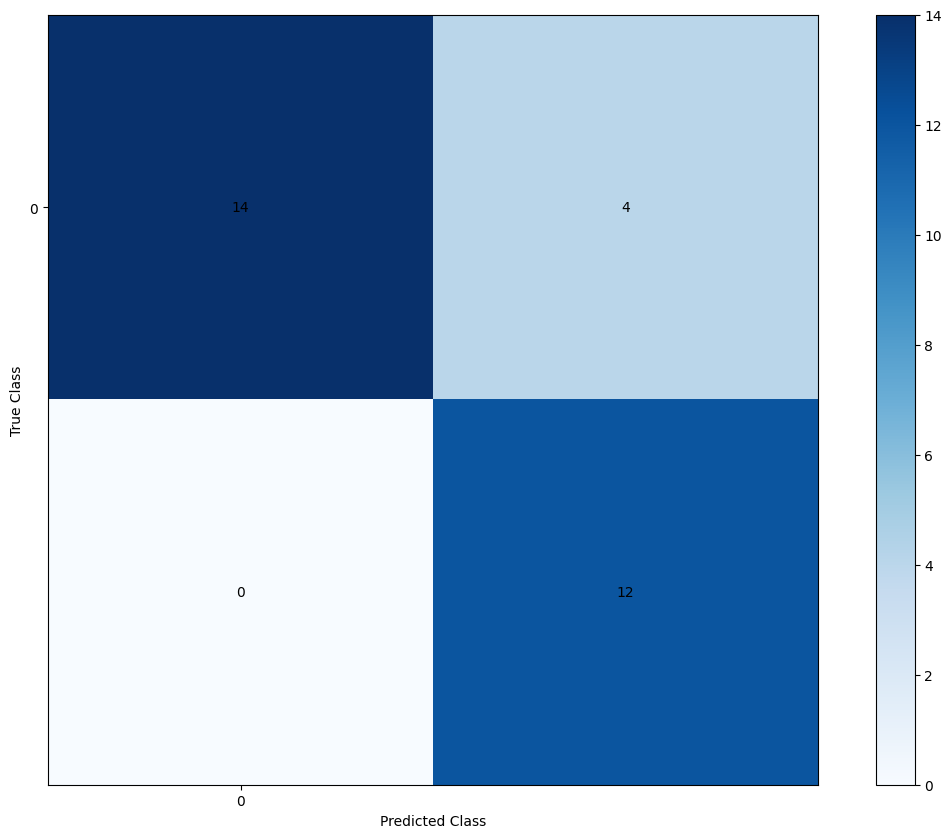


Treinando com learning_rate == 0.001 


100%|██████████| 100/100 [00:00<00:00, 1100.21it/s]


Grafico da função loss no treinamento com learning_rate == 0.001 


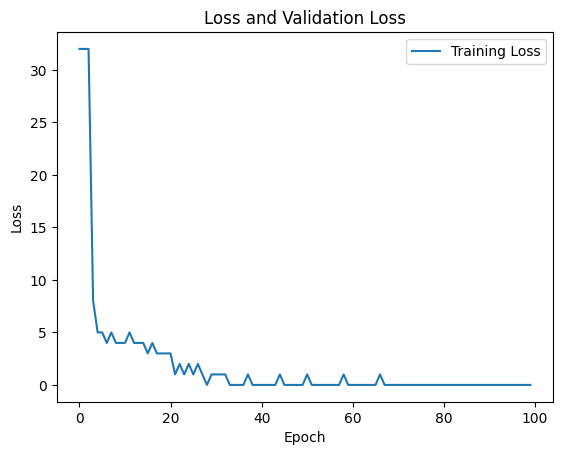

Confusion Matrix:
 [[18  0]
 [ 2 10]]
Accuracy: 0.9333333333333333
Precision: 1.0
Recall: 0.8333333333333334
F1-score: 0.9090909090909091


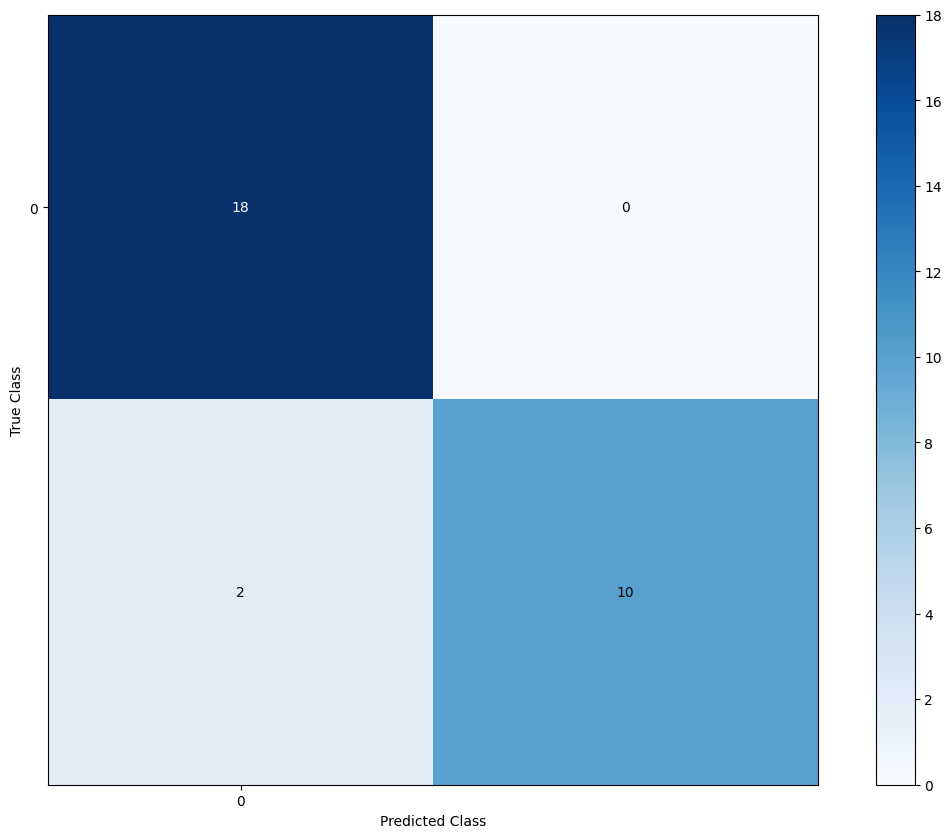


Treinando com learning_rate == 0.01 


100%|██████████| 100/100 [00:00<00:00, 1473.73it/s]


Grafico da função loss no treinamento com learning_rate == 0.01 


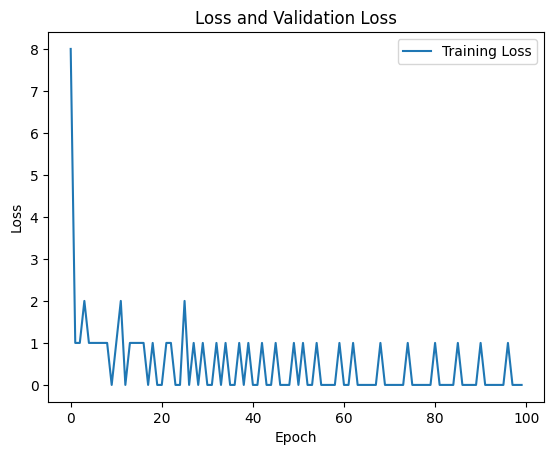

Confusion Matrix:
 [[18  0]
 [ 1 11]]
Accuracy: 0.9666666666666667
Precision: 1.0
Recall: 0.9166666666666666
F1-score: 0.9565217391304348


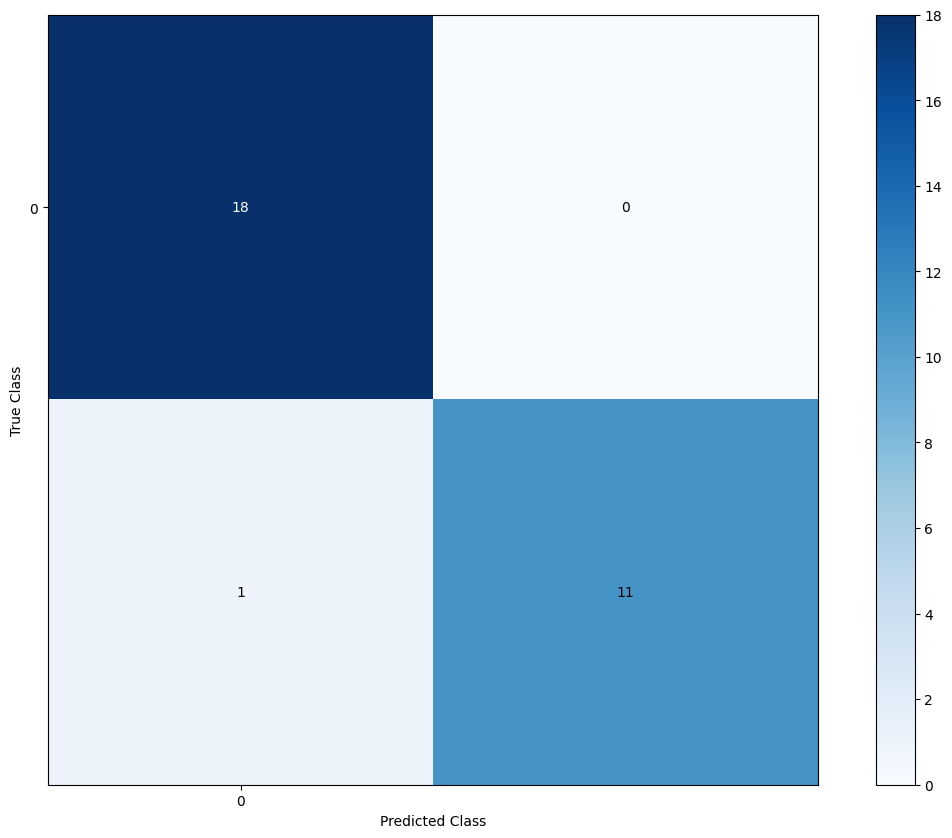


Treinando com learning_rate == 0.1 


100%|██████████| 100/100 [00:00<00:00, 1307.77it/s]


Grafico da função loss no treinamento com learning_rate == 0.1 


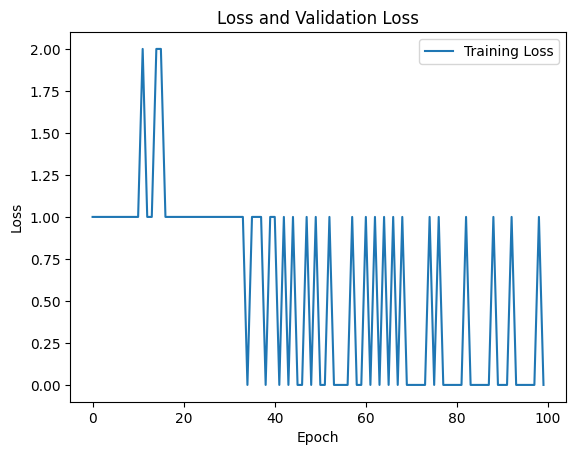

Confusion Matrix:
 [[18  0]
 [ 0 12]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


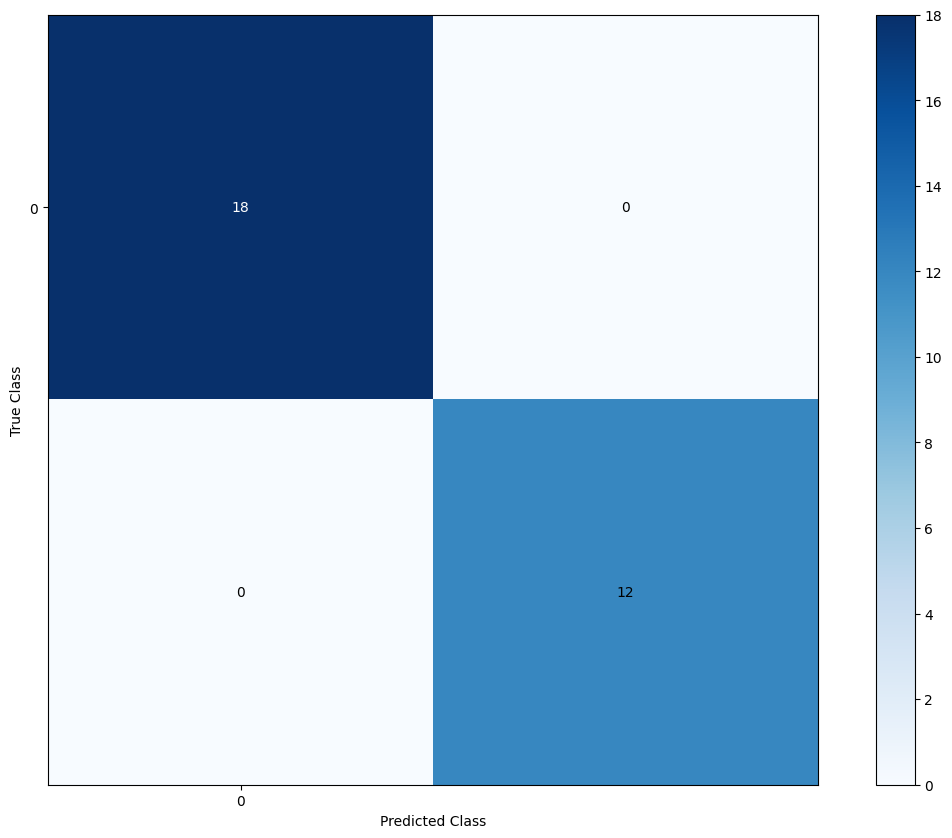

In [68]:
bs,ws = teste_variaves(epochs = 100, x = X_train, y = y_train ,X_test=X_test,y_test=y_test)

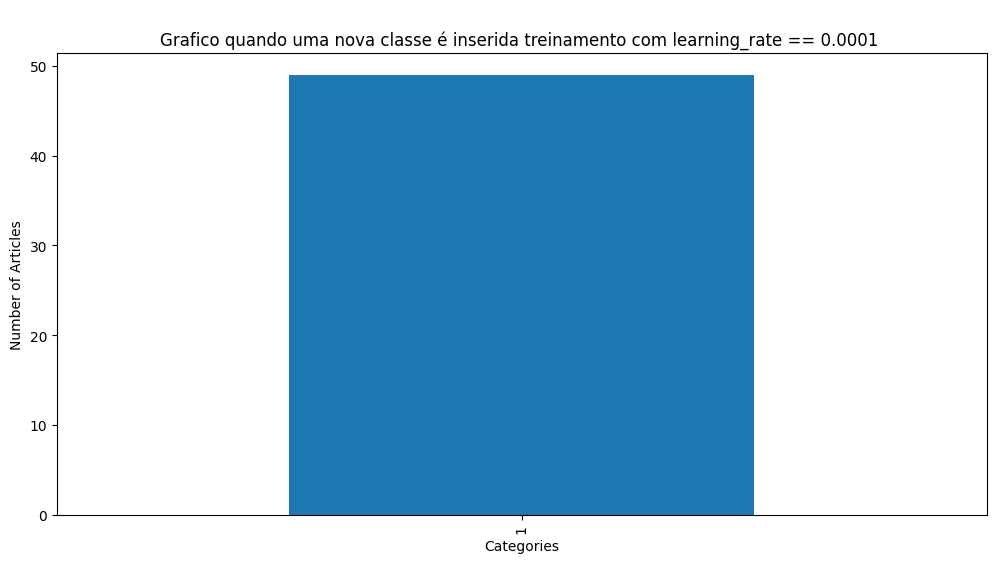

1    49
Name: 0, dtype: int64


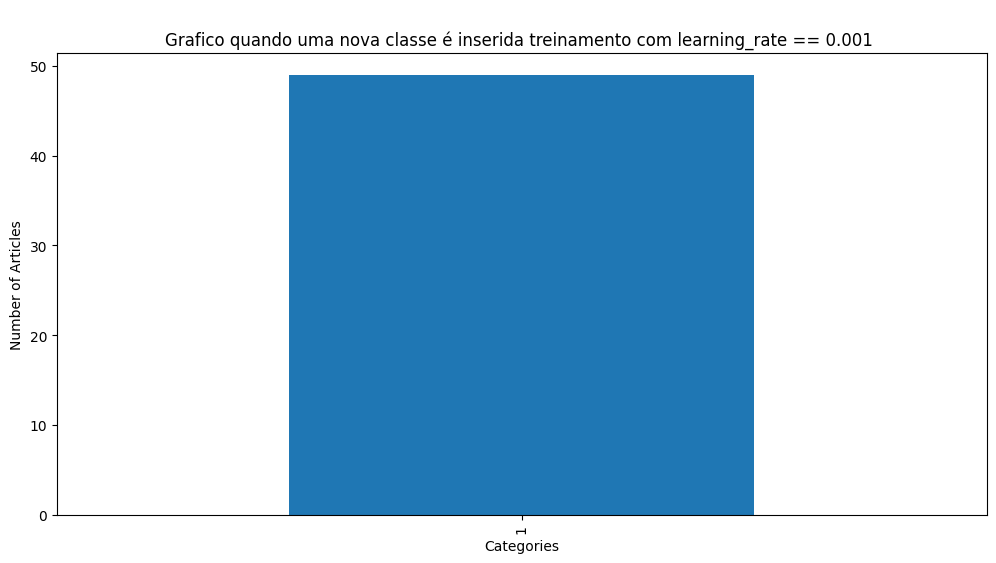

1    49
Name: 0, dtype: int64


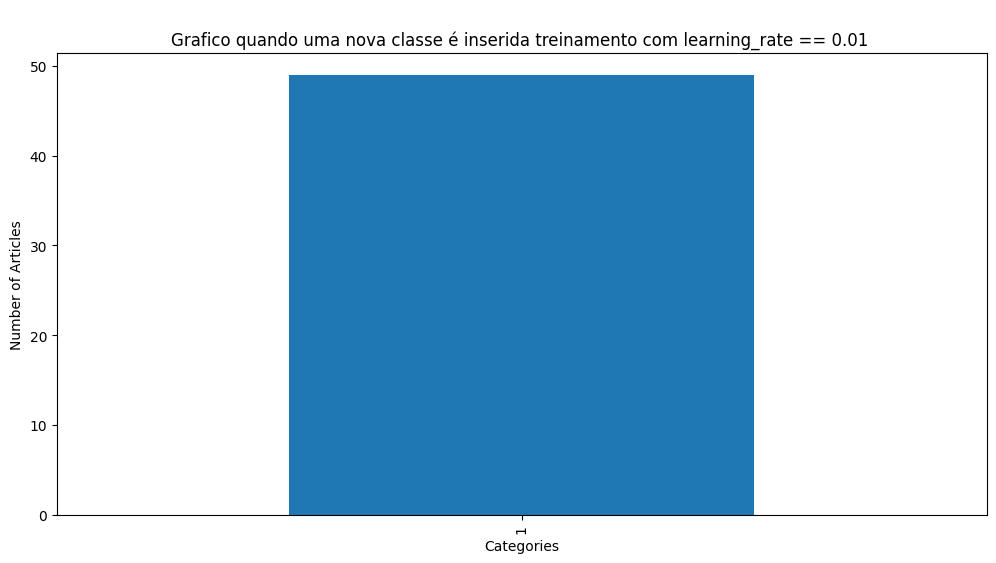

1    49
Name: 0, dtype: int64


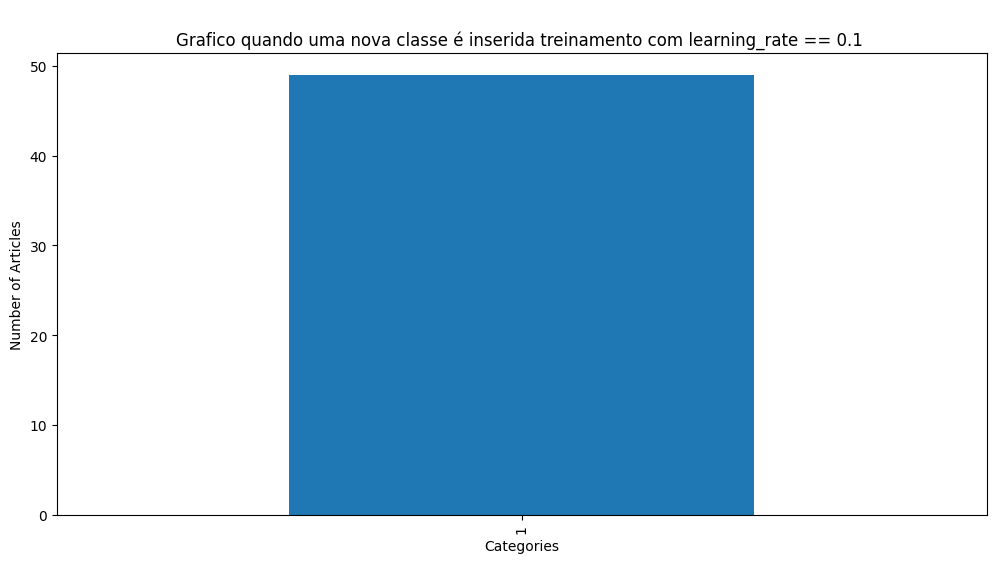

1    49
Name: 0, dtype: int64


In [69]:
teste_novas_classe(bs,ws)

# **90%10%**

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(len(X_train),len(X_test), len(y_train), len(y_test) )

90 10 90 10



Treinando com learning_rate == 0.0001 


100%|██████████| 100/100 [00:00<00:00, 1076.02it/s]


Grafico da função loss no treinamento com learning_rate == 0.0001 


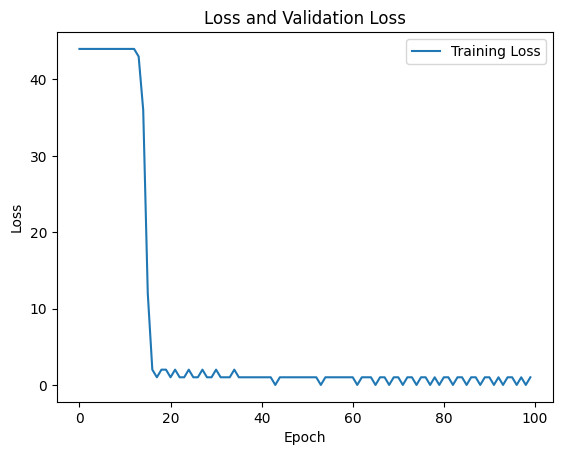

Confusion Matrix:
 [[5 1]
 [3 1]]
Accuracy: 0.6
Precision: 0.5
Recall: 0.25
F1-score: 0.3333333333333333


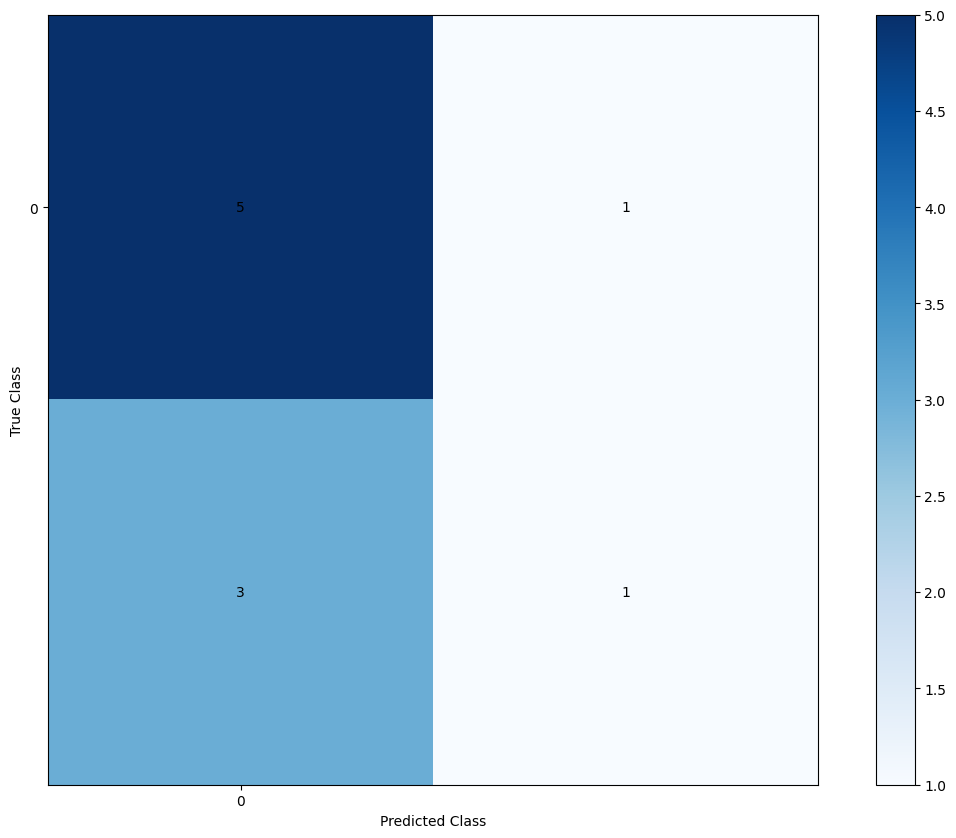


Treinando com learning_rate == 0.001 


100%|██████████| 100/100 [00:00<00:00, 886.05it/s]


Grafico da função loss no treinamento com learning_rate == 0.001 


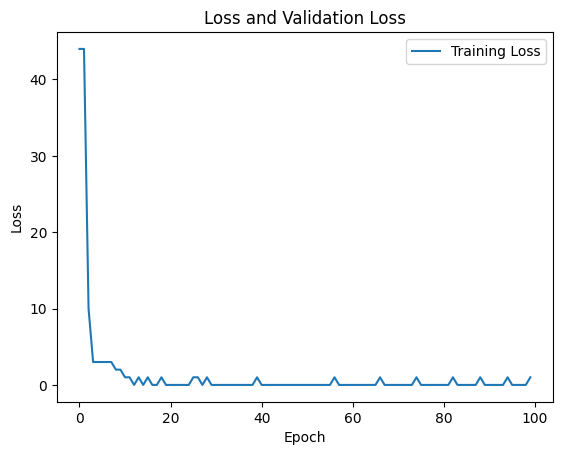

Confusion Matrix:
 [[6 0]
 [2 2]]
Accuracy: 0.8
Precision: 1.0
Recall: 0.5
F1-score: 0.6666666666666666


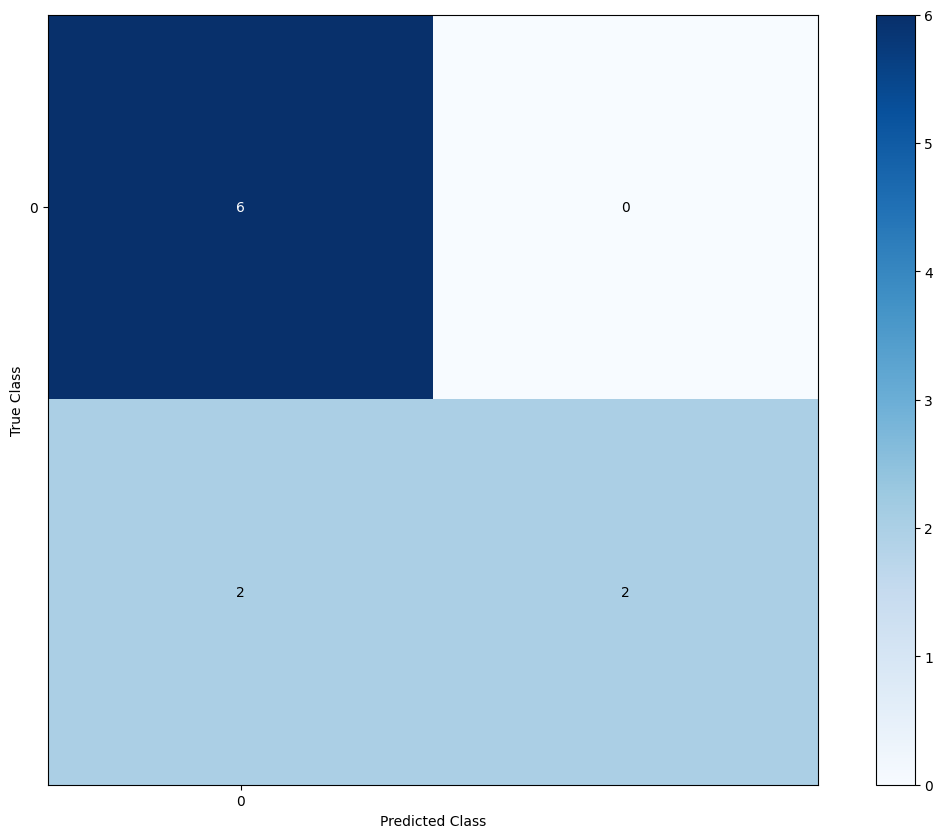


Treinando com learning_rate == 0.01 


100%|██████████| 100/100 [00:00<00:00, 1022.76it/s]


Grafico da função loss no treinamento com learning_rate == 0.01 


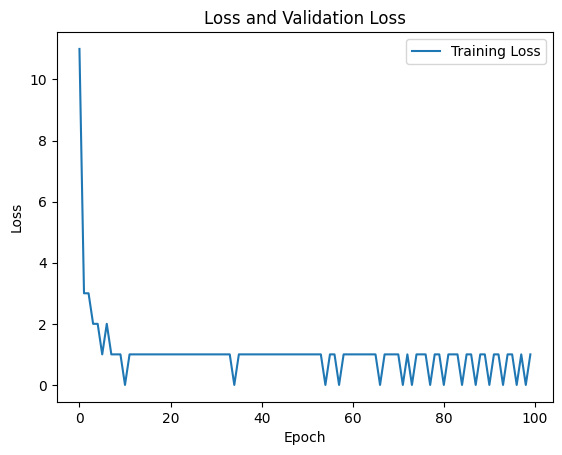

Confusion Matrix:
 [[6 0]
 [0 4]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


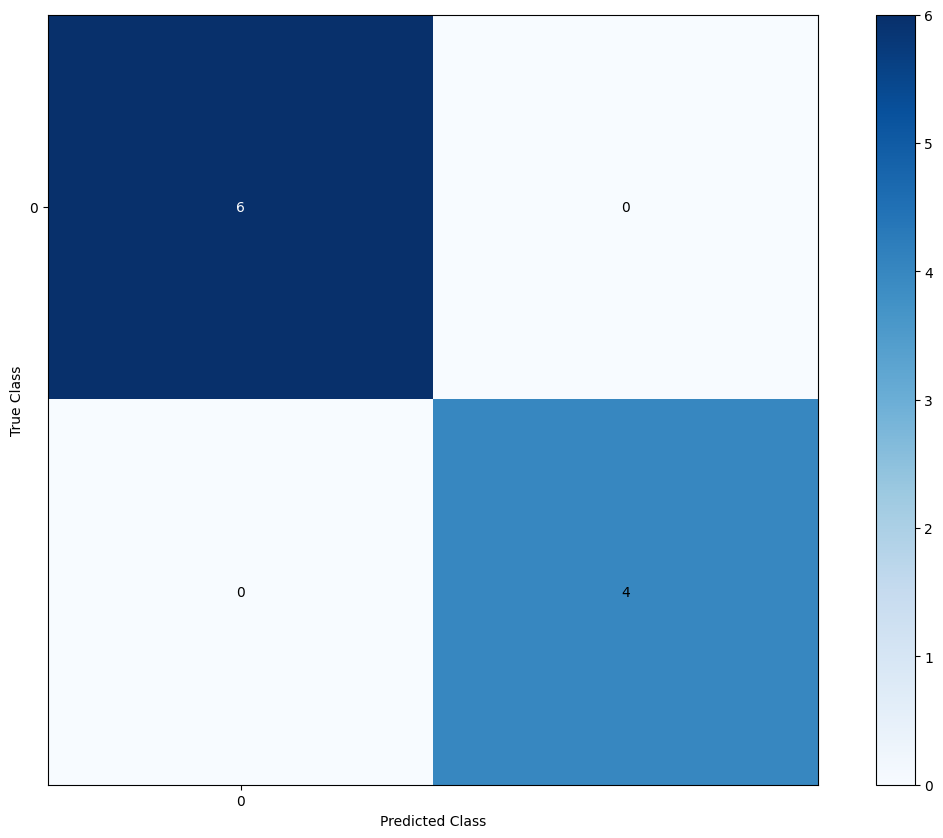


Treinando com learning_rate == 0.1 


100%|██████████| 100/100 [00:00<00:00, 1107.62it/s]


Grafico da função loss no treinamento com learning_rate == 0.1 


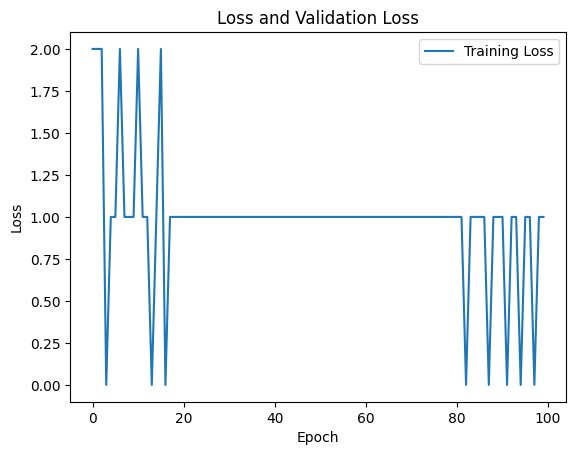

Confusion Matrix:
 [[6 0]
 [0 4]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


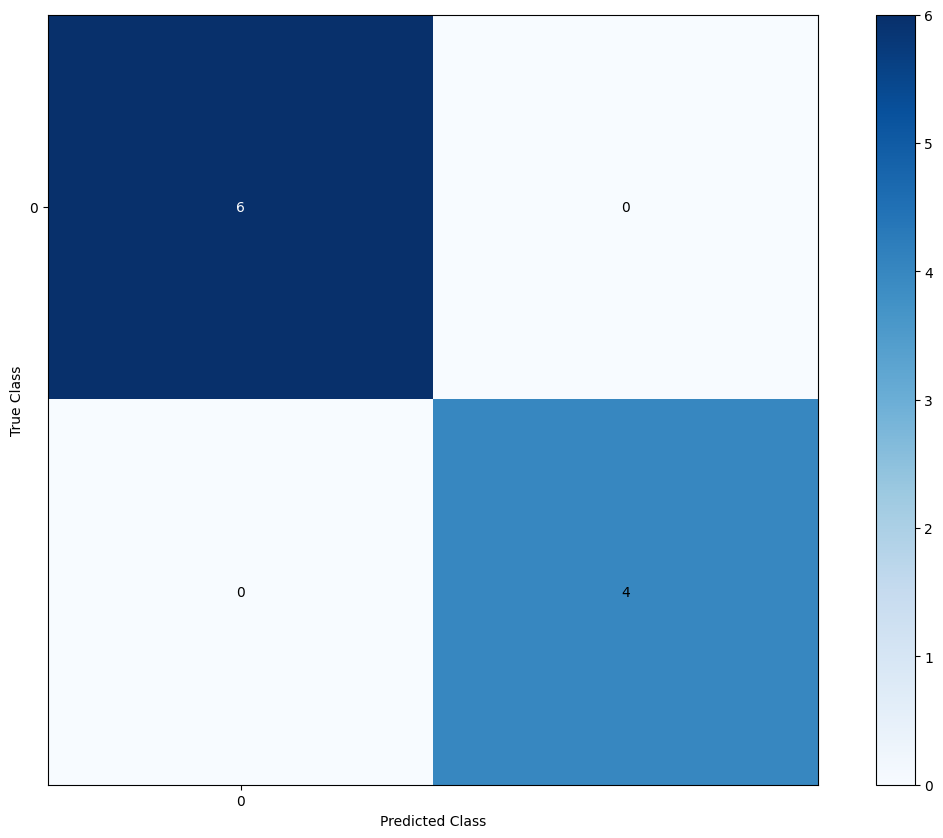

In [86]:
bs,ws = teste_variaves(epochs = 100, x = X_train, y = y_train ,X_test=X_test,y_test=y_test)

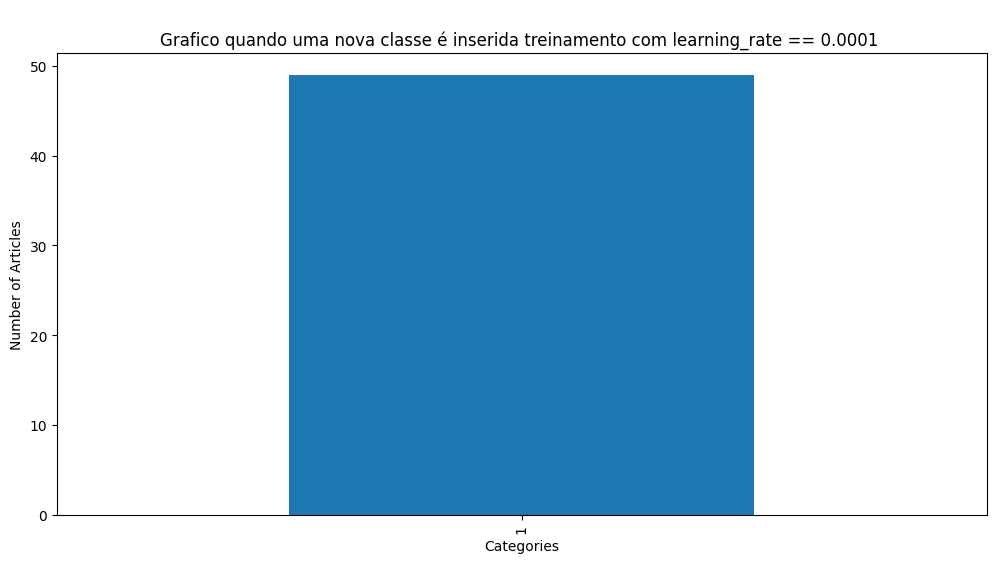

1    49
Name: 0, dtype: int64


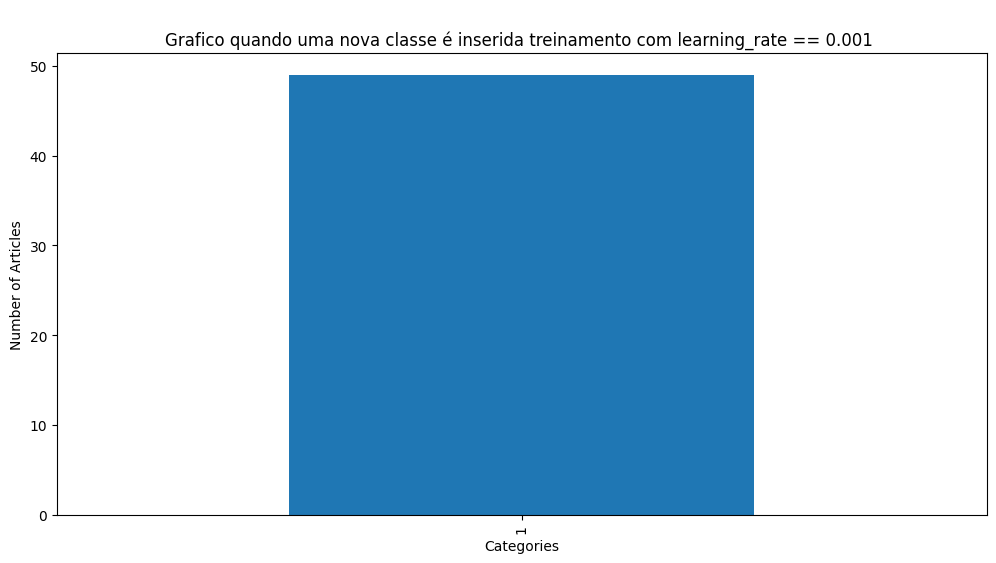

1    49
Name: 0, dtype: int64


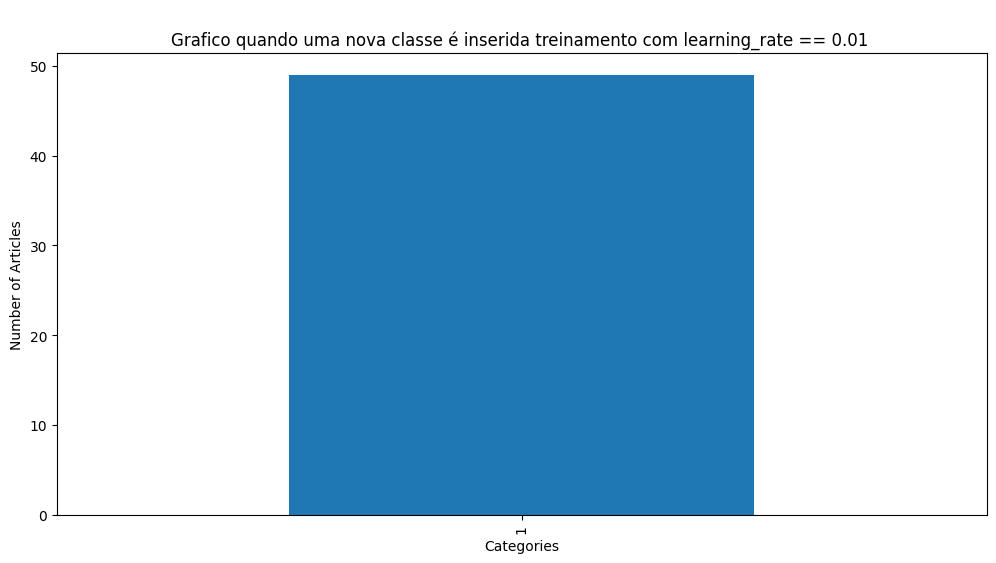

1    49
Name: 0, dtype: int64


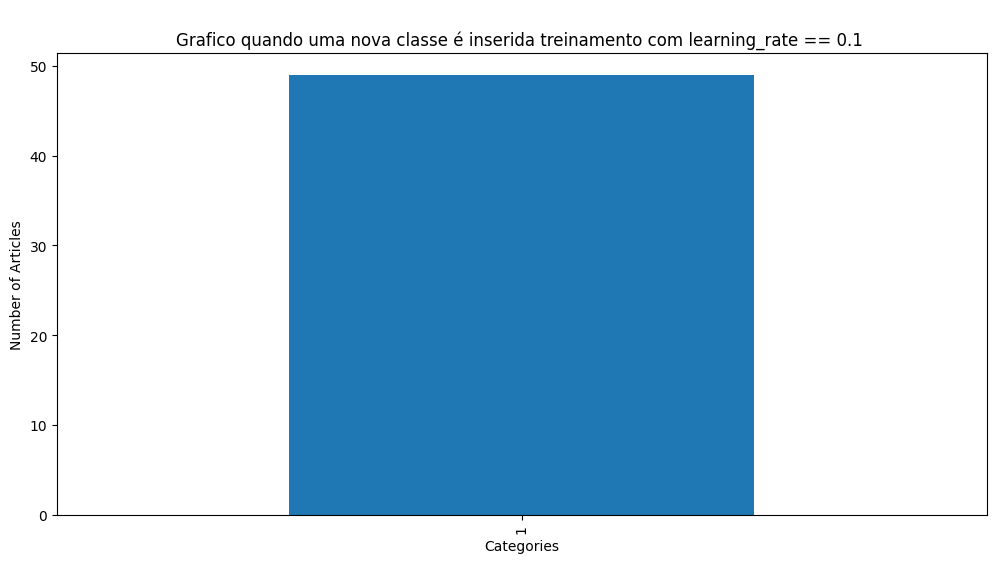

1    49
Name: 0, dtype: int64


In [60]:
teste_novas_classe(bs,ws)